## data generation

In [107]:
from locally_connected import LocallyConnected
from lbfgsb_scipy import LBFGSBScipy
from trace_expm import trace_expm
from sklearn.metrics import f1_score
import torch
import torch.nn as nn
import numpy as np
import scipy.sparse
import GraphNOTEARS
import notears_torch_version
import lasso
import dynotears
import utils as ut
import matplotlib.pyplot as plt

#device = torch.device("cuda:0")
device = torch.device("cuda")

In [108]:

def data_pre(n, d, s0, w_graph_type, p_graph_type, sem_type):
    #binary W
    w_true = ut.simulate_dag(d, s0, w_graph_type)
    #weighted W
    w_mat = ut.simulate_parameter(w_true)
    w_test_mat=w_mat.copy()
    #A
    adj1 = ut.generate_adj(n) 
    #node to target
    num_target=np.nonzero(w_mat[:,-1])#4,14
    if len(num_target)==0:
        print("invalid")
    else:
        #create the spurious variable
        for i in range(len(num_target[0])):
            suprious_list=np.nonzero(w_mat[num_target[0][i],:])#12

            for j in range(len(suprious_list[0])):
                suprious=suprious_list[0][j]
                #remove other outgoing link
                w_mat[suprious,:]=0 #12,0
                w_test_mat[suprious,:]=0
                #print(suprious)
                #revert the link in the test
                if suprious!=d-1:
                    w_test_mat[num_target[0][i],suprious]=-w_test_mat[num_target[0][i],suprious]
                
                
    num_step = 5 #cannot work if num_step=1
    #initial X0=X0W+B
    Xbase = []
    Xbase1 = ut.simulate_linear_sem(w_mat, n, sem_type, noise_scale=0.5)
    #X1=X1W+AX0W+B
    for i in range(num_step):
        Xbase1 = ut.simulate_linear_sem_with_P(w_mat, w_mat, adj1@Xbase1, n, sem_type, noise_scale=1)
        Xbase.append(Xbase1)
        
    #test data
    Xbase_test = []
    Xbase1_test = ut.simulate_linear_sem(w_test_mat, n, sem_type, noise_scale=0.5)
    for i in range(num_step):
        Xbase1_test = ut.simulate_linear_sem_with_P(w_test_mat, w_test_mat, adj1@Xbase1_test, n, sem_type, noise_scale=1)
        Xbase_test.append(Xbase1_test)

    return Xbase,Xbase_test, adj1, w_true,w_mat,w_test_mat

In [109]:
torch.set_default_dtype(torch.double)
np.set_printoptions(precision=3)

import utils as ut
ut.set_random_seed(12345)

n = 50 #number of people

d = 20 #number of features

w_graph_type = 'ER'
p_graph_type = 'ER' 
sem_type = 'exp'
s0 =  d

In [110]:
Xlags,Xlags_test, adj1, w_true,w_mat,w_test_mat = data_pre(n, d, s0, w_graph_type,p_graph_type, sem_type)

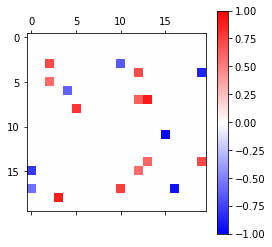

In [111]:
##True W
import matplotlib.pyplot as plt
plt.matshow(w_mat,cmap = 'bwr', vmin = -1, vmax = 1)
plt.colorbar()
plt.show()

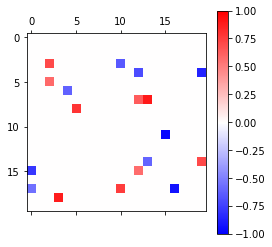

In [112]:
##True W
import matplotlib.pyplot as plt
plt.matshow(w_test_mat,cmap = 'bwr', vmin = -1, vmax = 1)
plt.colorbar()
plt.show()

In [113]:
np.shape(Xlags)

(5, 50, 20)

In [114]:
adj1.shape

(50, 50)

## fit the causal graph

In [115]:
Xlags_torch = torch.Tensor(np.array(Xlags))
adj1_torch = torch.Tensor(adj1)
model_1 = GraphNOTEARS.model_p1_MLP(dims=[d, n, 1], bias=True)
#model_1.to(device)
W_est_1, P1_est_1 = GraphNOTEARS.linear_model(model_1, Xlags_torch, adj1_torch,  lambda1 = 0.01, lambda2 = 0.01, lambda3 = 0.01)

rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rh

rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rh

rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rh

rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rho_max: 1.0 1e+16
h inf
rho < rh

h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.0 1e+16
h tensor(0.0664)
rho < rho_max: 1.

h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.

h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.0664)
rho < rho_max: 10.0 1e+16
h tensor(0.

h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.

h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.

h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.0152)
rho < rho_max: 10.0 1e+16
h tensor(0.

rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h ten

h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 100.0 1e+16
h tensor(0.0152)
rho < rho_max: 

rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h tensor(0.0035)
rho < rho_max: 100.0 1e+16
h ten

h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0

h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0.0035)
rho < rho_max: 1000.0 1e+16
h tensor(0

rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h ten

h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10000.0 1e+16
h tensor(0.0008)
rho < rho_max: 10

h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.00

rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(0.0008)
rho < rho_max: 100000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 100000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 100000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 100000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 100000.0 1e+16
h tensor(6.219

h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2

h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2194e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(6.2

h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 1000000.0 1e+16
h tensor(1.3

rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.312

h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0 1e+16
h tensor(1.3126e-05)
rho < rho_max: 10000000.0

h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 10000000.0

h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 100000000.0 1e+16
h tensor(3.0983e-06)
rho < r

h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3

h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3

h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3

h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3

h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3

h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3

rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(3.0983e-06)
rho < rho_max: 1000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 1000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 1000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 1000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 1000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_

h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.

h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 10000000000.

h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_max: 100000000000.0 1e+16
h tensor(2.0832e-07)
rho < rho_

h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_

h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_

rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1

h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_

rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1

h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_

rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1e+16
h tensor(1.8801e-08)
rho < rho_max: 100000000000.0 1

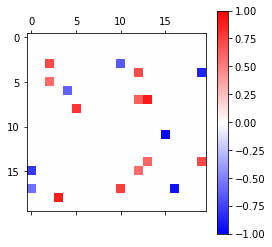

In [116]:
##True W
import matplotlib.pyplot as plt
plt.matshow(w_mat,cmap = 'bwr', vmin = -1, vmax = 1)
plt.colorbar()
plt.show()

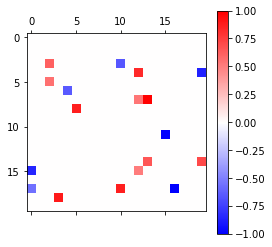

In [117]:
##Estimated W with the threshold
import matplotlib.pyplot as plt
plt.matshow((abs(W_est_1) > 0.4) * W_est_1,cmap = 'bwr', vmin = -1, vmax = 1)
plt.colorbar()
plt.show()

## process data to gnn format

In [118]:
import networkx as nx
import dgl

Using backend: pytorch


In [119]:
def get_node_feature(Xlags,node_num):
    for num_lags in range(1):
        if num_lags==0:
            X_feature=Xlags[num_lags][node_num]
        else:
            X_feature=np.append(X_feature,Xlags[num_lags][node_num])##shape num_lags*5 (250)
    return(X_feature)

In [120]:
def to_binary(x):
    if x>0.5:
        return 1
    else:
        return 0

In [121]:
G = nx.from_numpy_array(adj1)

In [122]:
n

50

In [123]:
import random

ut.set_random_seed(12345)
torch.manual_seed(12345)
valid_list=random.sample(range(50), 20) ##node list for validation
labels=[]
G = nx.from_numpy_array(adj1)
for node_num in range(n):
    G.nodes[node_num]['feature']=get_node_feature(Xlags,node_num)[:-1]
    
    G.nodes[node_num]['label']=to_binary(get_node_feature(Xlags,node_num)[-1])
    
    labels.append(G.nodes[node_num]['label'])
    if node_num in valid_list:
        G.nodes[node_num]['train_mask']=False
        G.nodes[node_num]['valid_mask']=True
    else:
        G.nodes[node_num]['train_mask']=True
        G.nodes[node_num]['valid_mask']=False

In [124]:
g = dgl.from_networkx(G, node_attrs=['feature','label','train_mask','valid_mask'])

D:\Anaconda\lib\site-packages\dgl\backend\pytorch\tensor.py:40: UserWarning:

Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)



In [125]:
g

Graph(num_nodes=50, num_edges=290,
      ndata_schemes={'feature': Scheme(shape=(19,), dtype=torch.float64), 'label': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'valid_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})

In [126]:
G_test = nx.from_numpy_array(adj1)
import random
ut.set_random_seed(12345)
torch.manual_seed(12345)
valid_list=random.sample(range(50), 20) ##node list for validation
labels=[]
G_test = nx.from_numpy_array(adj1)
for node_num in range(n):
    G_test.nodes[node_num]['feature']=get_node_feature(Xlags_test,node_num)[:-1]
    
    G_test.nodes[node_num]['label']=to_binary(get_node_feature(Xlags_test,node_num)[-1])
    
    labels.append(G_test.nodes[node_num]['label'])
    if node_num in valid_list:
        G_test.nodes[node_num]['train_mask']=False
        G_test.nodes[node_num]['valid_mask']=True
    else:
        G_test.nodes[node_num]['train_mask']=True
        G_test.nodes[node_num]['valid_mask']=False
g_test = dgl.from_networkx(G_test, node_attrs=['feature','label','train_mask','valid_mask'])
g_test

Graph(num_nodes=50, num_edges=290,
      ndata_schemes={'feature': Scheme(shape=(19,), dtype=torch.float64), 'label': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'valid_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})

## GCN

In [145]:
import dgl
import dgl.function as fn
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from dgl import DGLGraph

In [146]:
class GCNLayer(nn.Module):
    def __init__(self, in_feats, out_feats):
        super(GCNLayer, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)

    def forward(self, g, feature):
        # Creating a local scope so that all the stored ndata and edata
        # (such as the `'h'` ndata below) are automatically popped out
        # when the scope exits.
        with g.local_scope():
            g.ndata['h'] = feature
            g.update_all(gcn_msg, gcn_reduce)
            h = g.ndata['h']
            return self.linear(h)

In [147]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = GCNLayer(19, 8)
        self.layer2 = GCNLayer(8, 2)

    def forward(self, g, features):
        x = F.relu(self.layer1(g, features))
        x = self.layer2(g, x)
        return x


In [148]:
def evaluate(model, g, features, labels, mask):
    model.eval()
    with th.no_grad():
        logits = model(g, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = th.max(logits, dim=1)
        correct = th.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [149]:
import torch.nn.functional as F
import dgl
import dgl.function as fn
import torch.nn as nn
import torch.nn.functional as F
from dgl import DGLGraph
import random
ut.set_random_seed(12345)
torch.manual_seed(12345)
gcn_msg = fn.copy_u(u="h", out="m")
gcn_reduce = fn.sum(msg="m", out="h")

net = Net()
print(net)

features = g.ndata['feature']
labels = g.ndata['label']
train_mask = g.ndata['train_mask']
valid_mask = g.ndata['valid_mask']
###test
features_test = g_test.ndata['feature']
labels_test = g_test.ndata['label']
###metric
train_acc_list=[]
valid_acc_list=[]
test_acc_list=[]
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
early_stop_thresh = 50
best_loss = 99998
best_epoch = -1
for epoch in range(500):
    net.train()
    logits = net(g, features)
    logp = F.log_softmax(logits, 1)
    loss = F.nll_loss(logp[train_mask], labels[train_mask])

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    ##evaluate
    net.eval()
    train_acc = evaluate(net, g, features, labels, train_mask)
    valid_acc = evaluate(net, g, features, labels, valid_mask)
    test_acc = evaluate(net, g_test, features_test, labels_test, valid_mask)
    valid_loss = F.nll_loss(logp[valid_mask], labels[valid_mask])

    ##save the value
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)
    test_acc_list.append(test_acc)
    print(
        "Epoch {:05d} | Loss {:.4f}|Valid Loss {:.4f}| Train Acc {:.4f} | Valid Acc {:.4f} | Test Acc {:.4f}".format(
            epoch, loss.item(),valid_loss.item(), train_acc,valid_acc, test_acc
        )
    )
     # early stop if valid not inprove after 5 epoch
        
    if valid_loss < best_loss:
        best_loss = valid_loss
        best_epoch = epoch
        torch.save(net.state_dict(), "GCN_demo_large.pth")
    elif epoch - best_epoch > early_stop_thresh:
        print("Early stopped training at epoch %d" % epoch)
        break  # terminate the training loop
    

Net(
  (layer1): GCNLayer(
    (linear): Linear(in_features=19, out_features=8, bias=True)
  )
  (layer2): GCNLayer(
    (linear): Linear(in_features=8, out_features=2, bias=True)
  )
)
Epoch 00000 | Loss 3.7439|Valid Loss 0.5311| Train Acc 0.3000 | Valid Acc 0.1500 | Test Acc 0.1500
Epoch 00001 | Loss 4.4476|Valid Loss 7.0872| Train Acc 0.5667 | Valid Acc 0.4500 | Test Acc 0.6000
Epoch 00002 | Loss 1.5532|Valid Loss 1.3822| Train Acc 0.7000 | Valid Acc 0.9000 | Test Acc 0.9000
Epoch 00003 | Loss 2.2855|Valid Loss 0.3292| Train Acc 0.7333 | Valid Acc 0.9500 | Test Acc 0.9000
Epoch 00004 | Loss 2.4823|Valid Loss 0.3401| Train Acc 0.7333 | Valid Acc 0.8500 | Test Acc 0.8500
Epoch 00005 | Loss 1.8891|Valid Loss 0.3176| Train Acc 0.6000 | Valid Acc 0.6000 | Test Acc 0.7000
Epoch 00006 | Loss 1.2530|Valid Loss 0.9353| Train Acc 0.4333 | Valid Acc 0.4500 | Test Acc 0.5000
Epoch 00007 | Loss 1.5065|Valid Loss 2.8271| Train Acc 0.4667 | Valid Acc 0.4000 | Test Acc 0.4500
Epoch 00008 | Loss 1.6

Epoch 00080 | Loss 0.2057|Valid Loss 0.2468| Train Acc 0.9000 | Valid Acc 0.9000 | Test Acc 0.7500
Epoch 00081 | Loss 0.2036|Valid Loss 0.2538| Train Acc 0.9000 | Valid Acc 0.9000 | Test Acc 0.7500
Epoch 00082 | Loss 0.2007|Valid Loss 0.2416| Train Acc 0.9000 | Valid Acc 0.9000 | Test Acc 0.7500
Epoch 00083 | Loss 0.1985|Valid Loss 0.2269| Train Acc 0.9000 | Valid Acc 0.9000 | Test Acc 0.7500
Early stopped training at epoch 83


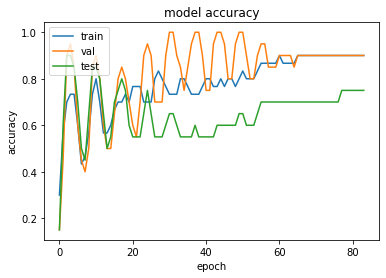

In [150]:
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(train_acc_list)
plt.plot(valid_acc_list)
plt.plot(test_acc_list)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val','test'], loc='upper left')
plt.show()

## attention_GCN

In [133]:
class atten_Net(nn.Module):
    def __init__(self, in_feats, hid_feats, out_feats,n_node):
        super(atten_Net, self).__init__()
        self.layer1 = GCNLayer(in_feats, hid_feats)
        self.layer2 = GCNLayer(hid_feats, out_feats)
        self.att_mlp_1 = nn.Linear(n_node, hid_feats)
        self.att_mlp_2 = nn.Linear(hid_feats, 2)

    def forward(self, g, features,dag):
        ##use mlp to get attention weights
        node_att = F.relu(self.att_mlp_1(dag))
        node_att = F.softmax(self.att_mlp_2(node_att), dim=-1)
        node_weight_c = node_att[:, 0]
        node_weight_o = node_att[:, 1]
        ##attention on the causal/trival part
        feature_c = node_weight_c.view(1, -1) * features
        feature_o = node_weight_o.view(1, -1) * features
        ## apply the mask on the features
        xc = F.relu(self.layer1(g, feature_c))
        xc = self.layer2(g, xc)
        xc=F.log_softmax(xc, 1)
        
        xo = F.relu(self.layer1(g, feature_o))
        xo = self.layer2(g, xo)
        xo=F.log_softmax(xo, 1)
        
        return xc,xo

In [134]:
def evaluate_new(model, g, features, labels, mask,dag):
    model.eval()
    with th.no_grad():
        logits_c,logits_o = model(g, features,dag)
        logits = logits_o[mask]
        labels = labels[mask]
        _, indices = th.max(logits, dim=1)
        correct = th.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [135]:
import random

ut.set_random_seed(12345)
torch.manual_seed(12345)
gcn_msg = fn.copy_u(u="h", out="m")
gcn_reduce = fn.sum(msg="m", out="h")
model = atten_Net(in_feats=19, hid_feats=8, out_feats=2,n_node=20)
print(model)
##
features = g.ndata['feature']
labels = g.ndata['label']
train_mask = g.ndata['train_mask']
valid_mask = g.ndata['valid_mask']
###metric
train_acc_list=[]
valid_acc_list=[]
test_acc_list=[]
###test
features_test = g_test.ndata['feature']
labels_test = g_test.ndata['label']
#params
early_stop_thresh = 50
best_loss = 99998
best_epoch = -1
alpha=0.3
beta=0.4

optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
#scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
for epoch in range(500):
    model.train()
    xc_logits,xo_logits = model(g, features,torch.tensor(W_est_1[:-1,:]))
    ##trivial part
    uniform_target = torch.ones_like(xc_logits[train_mask], dtype=torch.float)/2
    c_loss = F.kl_div(xc_logits[train_mask], uniform_target, reduction='batchmean')
    
    o_loss = F.nll_loss(xo_logits[train_mask], labels[train_mask])
    loss = alpha * c_loss + beta * o_loss 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #scheduler.step()
    ##evaluate
    model.eval()
    train_acc = evaluate_new(model, g, features, labels, train_mask,torch.tensor(W_est_1[:-1,:]))
    valid_acc = evaluate_new(model, g, features, labels, valid_mask,torch.tensor(W_est_1[:-1,:]))
    test_acc = evaluate_new(model, g_test, features_test, labels_test, valid_mask,torch.tensor(W_est_1[:-1,:]))
    #valid loss
    uniform_target = torch.ones_like(xc_logits[valid_mask], dtype=torch.float)/2
    c_loss = F.kl_div(xc_logits[valid_mask], uniform_target, reduction='batchmean')
    valid_loss = alpha * c_loss+beta *F.nll_loss(xo_logits[valid_mask], labels[valid_mask])
    #test loss
    test_xc_logits,test_xo_logits = model(g_test, features_test,torch.tensor(W_est_1[:-1,:]))
    uniform_target = torch.ones_like(test_xo_logits[valid_mask], dtype=torch.float)/2
    test_c_loss = F.kl_div(test_xc_logits[valid_mask], uniform_target, reduction='batchmean')
    test_o_loss = F.nll_loss(test_xo_logits[valid_mask], labels_test[valid_mask])
    test_loss = alpha * test_c_loss + beta * test_o_loss


    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)
    test_acc_list.append(test_acc)

    print(
        "Epoch {:05d} | Loss {:.4f}|Test Loss {:.4f}| Train Acc {:.4f} | Valid Acc {:.4f} | Test Acc {:.4f}".format(
            epoch, loss.item(),test_loss.item(), train_acc,valid_acc, test_acc
        )
    )
    # early stop if valid not inprove after 5 epoch
        
    if valid_loss < best_loss:
        best_loss = valid_loss
        best_epoch = epoch
        torch.save(model.state_dict(), "attention_demo_large.pth")
    elif epoch - best_epoch > early_stop_thresh:
        print("Early stopped training at epoch %d" % epoch)
        break  # terminate the training loop

atten_Net(
  (layer1): GCNLayer(
    (linear): Linear(in_features=19, out_features=8, bias=True)
  )
  (layer2): GCNLayer(
    (linear): Linear(in_features=8, out_features=2, bias=True)
  )
  (att_mlp_1): Linear(in_features=20, out_features=8, bias=True)
  (att_mlp_2): Linear(in_features=8, out_features=2, bias=True)
)
Epoch 00000 | Loss 1.6168|Test Loss 0.4515| Train Acc 0.7000 | Valid Acc 0.9500 | Test Acc 0.9500
Epoch 00001 | Loss 0.9423|Test Loss 0.3396| Train Acc 0.5667 | Valid Acc 0.5000 | Test Acc 0.6500
Epoch 00002 | Loss 0.5139|Test Loss 0.7939| Train Acc 0.4000 | Valid Acc 0.3000 | Test Acc 0.3000
Epoch 00003 | Loss 0.7004|Test Loss 1.0314| Train Acc 0.4333 | Valid Acc 0.2000 | Test Acc 0.2500
Epoch 00004 | Loss 0.8718|Test Loss 0.8768| Train Acc 0.4000 | Valid Acc 0.3000 | Test Acc 0.3000
Epoch 00005 | Loss 0.7417|Test Loss 0.5847| Train Acc 0.5333 | Valid Acc 0.4000 | Test Acc 0.5000
Epoch 00006 | Loss 0.5421|Test Loss 0.3632| Train Acc 0.5667 | Valid Acc 0.5000 | Test Acc 

Epoch 00086 | Loss 0.1730|Test Loss 0.3397| Train Acc 0.7333 | Valid Acc 0.9500 | Test Acc 0.7000
Epoch 00087 | Loss 0.1717|Test Loss 0.3417| Train Acc 0.7667 | Valid Acc 0.9500 | Test Acc 0.7000
Epoch 00088 | Loss 0.1705|Test Loss 0.3423| Train Acc 0.7667 | Valid Acc 0.9000 | Test Acc 0.7000
Epoch 00089 | Loss 0.1692|Test Loss 0.3408| Train Acc 0.7667 | Valid Acc 0.9000 | Test Acc 0.7000
Epoch 00090 | Loss 0.1679|Test Loss 0.3377| Train Acc 0.7667 | Valid Acc 0.9500 | Test Acc 0.7000
Epoch 00091 | Loss 0.1666|Test Loss 0.3341| Train Acc 0.7333 | Valid Acc 0.9500 | Test Acc 0.7000
Epoch 00092 | Loss 0.1652|Test Loss 0.3317| Train Acc 0.7667 | Valid Acc 0.9500 | Test Acc 0.7000
Epoch 00093 | Loss 0.1638|Test Loss 0.3322| Train Acc 0.8000 | Valid Acc 0.9500 | Test Acc 0.7000
Epoch 00094 | Loss 0.1624|Test Loss 0.3336| Train Acc 0.8000 | Valid Acc 0.9000 | Test Acc 0.7000
Epoch 00095 | Loss 0.1610|Test Loss 0.3343| Train Acc 0.8000 | Valid Acc 0.9000 | Test Acc 0.7000
Epoch 00096 | Loss 0

Epoch 00172 | Loss 0.0893|Test Loss 0.2535| Train Acc 0.9000 | Valid Acc 1.0000 | Test Acc 0.8000
Epoch 00173 | Loss 0.0887|Test Loss 0.2526| Train Acc 0.9000 | Valid Acc 1.0000 | Test Acc 0.8000
Epoch 00174 | Loss 0.0882|Test Loss 0.2525| Train Acc 0.9000 | Valid Acc 1.0000 | Test Acc 0.8000
Epoch 00175 | Loss 0.0877|Test Loss 0.2532| Train Acc 0.9000 | Valid Acc 1.0000 | Test Acc 0.8000
Epoch 00176 | Loss 0.0872|Test Loss 0.2540| Train Acc 0.9333 | Valid Acc 1.0000 | Test Acc 0.8000
Epoch 00177 | Loss 0.0867|Test Loss 0.2540| Train Acc 0.9333 | Valid Acc 1.0000 | Test Acc 0.8000
Epoch 00178 | Loss 0.0862|Test Loss 0.2532| Train Acc 0.9333 | Valid Acc 1.0000 | Test Acc 0.8000
Epoch 00179 | Loss 0.0856|Test Loss 0.2523| Train Acc 0.9333 | Valid Acc 1.0000 | Test Acc 0.8000
Epoch 00180 | Loss 0.0851|Test Loss 0.2527| Train Acc 0.9333 | Valid Acc 1.0000 | Test Acc 0.8000
Epoch 00181 | Loss 0.0846|Test Loss 0.2532| Train Acc 0.9333 | Valid Acc 1.0000 | Test Acc 0.8000
Epoch 00182 | Loss 0

Epoch 00259 | Loss 0.0545|Test Loss 0.2505| Train Acc 0.9667 | Valid Acc 0.9500 | Test Acc 0.8500
Epoch 00260 | Loss 0.0543|Test Loss 0.2515| Train Acc 0.9667 | Valid Acc 0.9500 | Test Acc 0.8500
Epoch 00261 | Loss 0.0539|Test Loss 0.2523| Train Acc 0.9667 | Valid Acc 0.9500 | Test Acc 0.8500
Epoch 00262 | Loss 0.0536|Test Loss 0.2520| Train Acc 0.9667 | Valid Acc 0.9500 | Test Acc 0.8500
Epoch 00263 | Loss 0.0533|Test Loss 0.2522| Train Acc 0.9667 | Valid Acc 0.9500 | Test Acc 0.8500
Epoch 00264 | Loss 0.0530|Test Loss 0.2531| Train Acc 0.9667 | Valid Acc 0.9500 | Test Acc 0.8500
Epoch 00265 | Loss 0.0527|Test Loss 0.2536| Train Acc 0.9667 | Valid Acc 0.9500 | Test Acc 0.8500
Epoch 00266 | Loss 0.0524|Test Loss 0.2531| Train Acc 0.9667 | Valid Acc 0.9500 | Test Acc 0.8500
Epoch 00267 | Loss 0.0521|Test Loss 0.2529| Train Acc 0.9667 | Valid Acc 0.9500 | Test Acc 0.8500
Epoch 00268 | Loss 0.0518|Test Loss 0.2532| Train Acc 0.9667 | Valid Acc 0.9500 | Test Acc 0.8500
Epoch 00269 | Loss 0

Epoch 00343 | Loss 0.0340|Test Loss 0.2817| Train Acc 1.0000 | Valid Acc 0.8500 | Test Acc 0.9000
Epoch 00344 | Loss 0.0338|Test Loss 0.2823| Train Acc 1.0000 | Valid Acc 0.8500 | Test Acc 0.9000
Epoch 00345 | Loss 0.0336|Test Loss 0.2828| Train Acc 1.0000 | Valid Acc 0.8500 | Test Acc 0.9000
Early stopped training at epoch 345


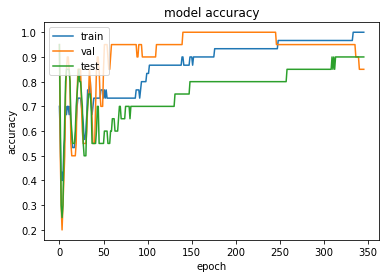

In [136]:
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(train_acc_list)
plt.plot(valid_acc_list)
plt.plot(test_acc_list)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val','test'], loc='upper left')
plt.show()